# Evaluating the performance of the EcoWG1 library
Here we will evaluate the performance of the EcoWG1 library. Strain LC-E75 carrying the EcoWG1 library in the psgRNA plasmid was plated on LB agar with 1uM aTc for 18H, and the sgRNA library sequenced before and after the experiment. Normalized log2FC for each guide were computed as before (see Methods). 

To evaluate the quality of the EcoWG1 library we first compared how well this novel dataset could be used to predict gene essentiality in E. coli as compared with the data we obtained previously with the Cui 2018 library and data generated by Wang and coallegues with a library of xxx guides containing xx guides per gene. We use here the recent TraDIS data as ground truth for gene essentiality in E. coli K12.



In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr , pearsonr

figure_path_str = "figures/"
Path(figure_path_str).mkdir(exist_ok=True)

%matplotlib inline
data_path="data/"
data=pd.read_csv(data_path+"EcoWG1_data.csv",index_col=0)
#data.index=data.guide
data.head()

T1        T2        T3        T4  gene ori
GGAAGGGTGGCTTCGAGCGT -0.318812 -0.715367 -1.929731 -2.313596  nuoF   -
GATCGCCGGAACGTTACACA  0.068076 -0.338745 -1.623424 -1.972200  nuoF   -
CCGGAGGTTGCCGGGAAGGG -0.102250 -0.542420 -1.929249 -1.131536  nuoF   -
ACTTCCGTGCCATCAATAAA -0.050367  0.163559  0.247522  0.313455  sufA   -
GCCACAGCCACATTCATTCT  0.161503  0.323315  0.230441  0.648901  sufA   -

In [2]:
#Opening the TraDIS data
TraDIS=pd.read_csv(data_path+"Goodall_TraDIS.csv",sep=";")
TraDIS.index=TraDIS.Gene
TraDIS=TraDIS.rename({"Gene":"gene"},axis=1)
TraDIS.head()

gene  index_score  Log_Likelihood_Ratio  Essential  Non-essential  \
Gene                                                                      
thrL  thrL     0.393939             31.431059      False           True   
thrA  thrA     0.219245             17.200782      False           True   
thrB  thrB     0.265809             21.234549      False           True   
thrC  thrC     0.205905             15.994924      False           True   
yaaX  yaaX     0.225589             17.765507      False           True   

      Unclear  
Gene           
thrL    False  
thrA    False  
thrB    False  
thrC    False  
yaaX    False

In [3]:
TraDIS["gene"]=TraDIS.index
#drop duplicates is necessary as some genes are present on multiple lines in this dataframe
ess=TraDIS[["gene","Essential"]].drop_duplicates()[["Essential"]]
ess=ess.fillna(False)

In [4]:
#Opening the Cui 2018 data
cui2018data="https://gitlab.pasteur.fr/dbikard/badSeed_public/raw/master/screen_data.csv"
cui2018data=pd.read_csv(cui2018data,index_col=0)
cui2018data["guide"]=cui2018data.index
cui2018data=cui2018data[cui2018data.ntargets==1]
cui2018data.head()

gene essential      pos ori coding     fit18     fit75  \
guide                                                                          
AAAAAACCTGCTGGTGAGGC   NaN       NaN  2202483   -    NaN -4.850012 -1.437546   
AAAAAACGTATTCGCTTGCA  curA     False  1517891   +  False -0.094026 -0.100313   
AAAAAAGCGCACTTTTTGAC   NaN       NaN  1919717   +    NaN -1.109310 -0.246740   
AAAAAAGCGGTGACTTACGA  bglA     False  3042929   +  False -1.328831 -0.905068   
AAAAAATCTGCCCGTGTCGT  gyrA      True  2337231   -  False -0.840373 -0.598858   

                      ntargets  \
guide                            
AAAAAACCTGCTGGTGAGGC         1   
AAAAAACGTATTCGCTTGCA         1   
AAAAAAGCGCACTTTTTGAC         1   
AAAAAAGCGGTGACTTACGA         1   
AAAAAATCTGCCCGTGTCGT         1   

                                                                    seq  \
guide                                                                     
AAAAAACCTGCTGGTGAGGC  AAAGCAGATCACAGTAAATAAAAAAACCTGCTGGTGAGGCAGGTTC...   
AAAAAACGTATTCGCTTGCA  TGTTGATGGCTACAGTGCTGAAAAAACGTATTCGCTTGCAAGGTTT...   
AAAAAAGCGCACTTTTTGAC  GTAACGCCTGACAGCGCACAAAAAAAGCGCACTTTTTGACTGGCAC...   
AAAAAAGCGGTGACTTACGA  GCGCCCATATCGAAGAGATGAAAAAAGCGGTGACTTACGATGGCGT...   
AAAAAATCTGCCCGTGTCGT  ATGACTGGAACAAAGCCTATAAAAAATCTGCCCGTGTCGTTGGTGA...   

                                     guide  
guide                                       
AAAAAACCTGCTGGTGAGGC  AAAAAACCTGCTGGTGAGGC  
AAAAAACGTATTCGCTTGCA  AAAAAACGTATTCGCTTGCA  
AAAAAAGCGCACTTTTTGAC  AAAAAAGCGCACTTTTTGAC  
AAAAAAGCGGTGACTTACGA  AAAAAAGCGGTGACTTACGA  
AAAAAATCTGCCCGTGTCGT  AAAAAATCTGCCCGTGTCGT

In [5]:
#Opening the Wang 2018 data
wangDF=pd.read_excel(data_path+"wang/41467_2018_4899_MOESM9_ESM.xlsx")
wang_guides=pd.read_excel(data_path+"wang/41467_2018_4899_MOESM6_ESM.xlsx")
wangDF=wangDF.merge(wang_guides,left_on="sgRNA",right_on="sgRNAID")
wangDF.head()

sgRNA  gene  sgRNA fitness   Z score Quality        sgRNAID  \
0  gspKb3332_817  gspK      -0.678534 -0.799152    Good  gspKb3332_817   
1   intRb1345_13  intR       0.259722  0.305891    Good   intRb1345_13   
2  yhbJb3205_520  yhbJ      -0.750647 -0.884084    Good  yhbJb3205_520   
3  yeaPb1794_399  yeaP       0.779452  0.918010    Good  yeaPb1794_399   
4  dsdXb2365_446  dsdX       0.502866  0.592257    Good  dsdXb2365_446   

    nucleotide sequence  
0  CTTTTCACCTGAGCAACCAG  
1  CCTCTAATCTCGACACCTGT  
2  AAGACGTAATCTGCATCGAT  
3  GTTCCGCGCGTTCACTCCAC  
4  GCAGTGCACTGCCATCAATG

The TraDIS table uses the gene names provided in the BW25113 genome annotation. Because genes were named inconsistently between datasets we add the gene name that match the TraDIS table

In [6]:
gene_nameDF=pd.read_csv(data_path+"gene_synonyms.csv",index_col=0)
gene_nameDF_wang=pd.read_csv(data_path+"gene_synonyms_wang.csv",index_col=0)
gene_name_dic=dict(zip(gene_nameDF.index.values,gene_nameDF.gene.values))
gene_name_dic_wang=dict(zip(gene_nameDF_wang.index.values,gene_nameDF_wang.gene.values))

In [7]:
cui2018data["geneBW"]=[gene_name_dic.get(name,None) for name in cui2018data.gene.values]
data["geneBW"]=[gene_name_dic.get(name,None) for name in data.gene.values]
wangDF["geneBW"]=[gene_name_dic_wang.get(name,None) for name in wangDF.gene.values]
wangDF.head()

sgRNA  gene  sgRNA fitness   Z score Quality        sgRNAID  \
0  gspKb3332_817  gspK      -0.678534 -0.799152    Good  gspKb3332_817   
1   intRb1345_13  intR       0.259722  0.305891    Good   intRb1345_13   
2  yhbJb3205_520  yhbJ      -0.750647 -0.884084    Good  yhbJb3205_520   
3  yeaPb1794_399  yeaP       0.779452  0.918010    Good  yeaPb1794_399   
4  dsdXb2365_446  dsdX       0.502866  0.592257    Good  dsdXb2365_446   

    nucleotide sequence geneBW  
0  CTTTTCACCTGAGCAACCAG   gspK  
1  CCTCTAATCTCGACACCTGT   intR  
2  AAGACGTAATCTGCATCGAT   yhbJ  
3  GTTCCGCGCGTTCACTCCAC   yeaP  
4  GCAGTGCACTGCCATCAATG   dsdX

In [8]:
from sklearn.metrics import roc_curve, auc


EcoWG1_GB=data[["geneBW","T1","T2","T3","T4"]].groupby("geneBW")
geneDF=EcoWG1_GB.median()
geneDF.shape

(4248, 4)

In [9]:
geneDF=geneDF.join(ess,how="inner")
geneDF.shape

(4151, 5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


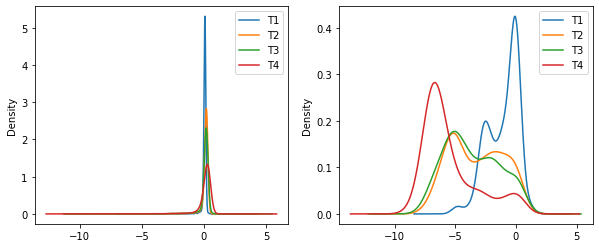

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
geneDF[~geneDF.Essential].plot.kde(ax=ax1)
geneDF[geneDF.Essential].plot.kde(ax=ax2)
plt.savefig(figure_path_str + "gene_median_distribution.eps",format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


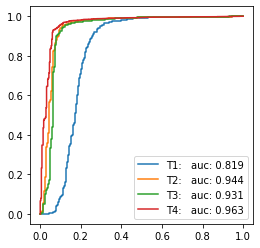

In [11]:
fig, ax= plt.subplots(1,1,figsize=(4,4))


for c in ["T1","T2","T3","T4"]:
    y_true=geneDF.dropna().Essential.values
    y_true=y_true.astype(np.bool)
    y_score=geneDF.dropna()[c].values
    fpr, tpr, thresholds = roc_curve(y_true,y_score)
    ax.plot(tpr,fpr,label="{}:   auc: {:.3f}".format(c,auc(tpr,fpr)))
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.savefig(figure_path_str + "ROC_curves_EcoWG1.eps",format="eps")
plt.show()

### Get genes targeted by at least 5 guides in all datasets

In [12]:
EcoWG1_GB=data[["geneBW","T4"]].groupby("geneBW")
cui_GB=cui2018data.loc[cui2018data.coding==True,["geneBW","fit75"]].groupby("geneBW")
wang_GB=wangDF[["geneBW","Z score"]].groupby("geneBW")

EcoWG1_N=EcoWG1_GB.agg(len)
cui_N=cui_GB.agg(len)
wang_N=wang_GB.agg(len)

g1=EcoWG1_N[EcoWG1_N.iloc[:,0]>=5]
g2=cui_N[cui_N.iloc[:,0]>=5]
g3=wang_N[wang_N.iloc[:,0]>=5]

print(len(set(TraDIS.index)),len(g1),len(g2),len(g3))
gene_list=set(TraDIS.index) & set(g1.index) & set(g2.index) & set(g3.index)
TraDIS["gene"]=TraDIS.index
#drop duplicates is necessary as some genes are present on multiple lines in this dataframe
ess=TraDIS[["gene","Essential"]].drop_duplicates().loc[gene_list].Essential
ess=ess.fillna(False) #uncertain genes are considered non-essential. The results are almost identical if the opposite is done.
print(len(gene_list))

EcoWG1_GB=data.loc[data.geneBW.isin(gene_list),["geneBW","T1","T2","T3","T4"]].groupby("geneBW")
cui_GB=cui2018data.loc[(cui2018data.coding==True) & cui2018data.geneBW.isin(gene_list),["geneBW","fit75"]].groupby("geneBW")
wang_GB=wangDF.loc[wangDF.geneBW.isin(gene_list),["geneBW","Z score"]].groupby("geneBW")


4269 3946 2589 3905
2465


### Computing AUC of essential gene prediction in this dataset

In [13]:
from sklearn.metrics import roc_curve, auc
def aucs_nguides(geneGB,gene_list,N,k,score="T4",add_all_guides=True):
    '''Compute AUCs for essential gene prediction as function of the number of guides used to make the prediction. 
    Uses a groupby object of a dataframe as an input.
    k specifies the number of guide combinations to test.
    N specifies the maximum number of guides to consider.
    gene_list specifies the gene names to keep in the analysis. This is important to ensure that we compare methods based on the same genes.'''
    TPFP_nguides=[]
    for n in range(1,N+1):
        dfs=[geneGB.aggregate(lambda x: np.median(np.random.choice(x,n,replace=False))) for i in range(k)]
        dfs=[df.loc[gene_list] for df in dfs]
        #ess=[x in essential_list for x in dfs[0].index]
        TPFPs=[]
        for df in dfs:
            fpr, tpr, thresholds = roc_curve(ess,df[score])
            TPFPs.append((tpr,fpr))

        TPFP_nguides.append(TPFPs)
        
    aucs=[[[i+1,auc(tpr,fpr)] for tpr,fpr in TPFPs] for i,TPFPs in enumerate(TPFP_nguides)]
    nguides, aucs = zip(*[x for y in aucs for x in y])
    
    if add_all_guides:
        df=geneGB.median()
        df=df.loc[gene_list]
        fpr, tpr, thresholds = roc_curve(ess,df[score])
        nguides += (N+1,)
        aucs += (auc(tpr,fpr),)
        
    return nguides, aucs

nguides, aucs = aucs_nguides(EcoWG1_GB,gene_list,5,3,score="T4")   
nguides2, aucs2 = aucs_nguides(EcoWG1_GB,gene_list,5,3,score="T2")    
cui_nguides, cui_aucs= aucs_nguides(cui_GB,gene_list,5,3,score="fit75")
wang_n_guides, wang_aucs= aucs_nguides(wang_GB,gene_list,5,3,score="Z score")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


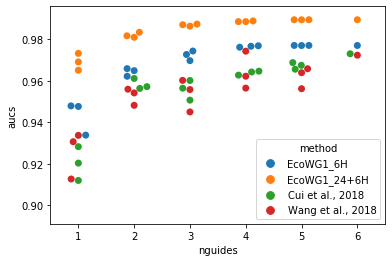

In [14]:
import seaborn as sns
swarmdf=pd.DataFrame({"nguides":nguides2+nguides+cui_nguides+wang_n_guides,
                     "aucs":aucs2+aucs+cui_aucs+wang_aucs,
                     "method":["EcoWG1_6H"]*len(nguides2)+["EcoWG1_24+6H"]*len(nguides)+["Cui et al., 2018"]*len(cui_nguides)+["Wang et al., 2018"]*len(wang_n_guides)})

sns.swarmplot("nguides","aucs",data=swarmdf,hue="method",size=7)
plt.savefig(figure_path_str + "AUCs_nguides.eps",format="eps")

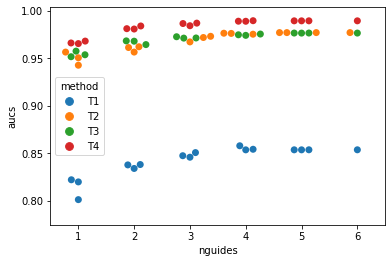

In [15]:
nguidesT=[]
aucsT=[]
method=[]
for i in range(1,5):
    nguides, aucs = aucs_nguides(EcoWG1_GB,gene_list,5,3,score="T%s"%(i))   
    nguidesT+=nguides
    aucsT+=aucs
    method+=["T%s"%(i)]*len(aucs)

swarmdf=pd.DataFrame({"nguides":nguidesT,
                     "aucs":aucsT,
                     "method":method})

sns.swarmplot("nguides","aucs",data=swarmdf,hue="method",size=7)

In [16]:
swarmdf[swarmdf.nguides==6].aucs.values

array([0.8535326 , 0.97696057, 0.97645147, 0.98933872])